In [ ]:

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

# Load your dataset
# Make sure the dataset is placed appropriately, or adjust the path accordingly
data = pd.read_csv('/content/large_sms_spam_dataset.csv')  # Replace with actual dataset path
data['cleaned_text'] = data['text'].apply(clean_text)


In [ ]:

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(data['cleaned_text'])
y = data['label'].apply(lambda x: 1 if x == 'spam' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2409
           1       1.00      1.00      1.00      1591

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



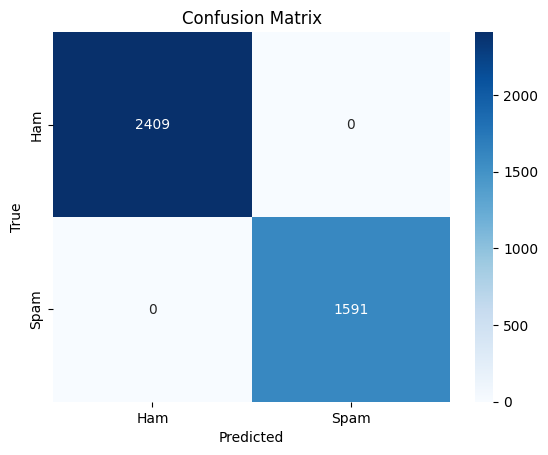

In [ ]:

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import os
import joblib

# Create the directory if it doesn't exist
os.makedirs('backend/model/', exist_ok=True)

joblib.dump(model, 'backend/model/model.pkl')
joblib.dump(tfidf, 'backend/model/vectorizer.pkl')
print("Model and vectorizer saved to backend/model/")

Model and vectorizer saved to backend/model/


In [ ]:

def predict_message(message):
    cleaned = clean_text(message)
    vectorized = tfidf.transform([cleaned])
    pred = model.predict(vectorized)[0]
    return 'Spam' if pred == 1 else 'Ham'

# Test example
message = "Congratulations! Your mobile number has WON $1,000,000 in the Global Mobile Lottery 2025! To claim, send your name and address to win@globaldraws.com.."
print(f"Prediction: {predict_message(message)}")


Prediction: Spam


In [ ]:
# prompt: give code to download this backend folder

from google.colab import files
import os

# Ensure the directory exists before attempting to zip
if os.path.exists('backend/model/'):
  # Zip the directory
  !zip -r /content/backend_model.zip backend/model/
  # Download the zip file
  files.download('/content/backend_model.zip')
else:
  print("Directory 'backend/model/' not found. Please ensure the model and vectorizer were saved correctly.")

  adding: backend/model/ (stored 0%)
  adding: backend/model/vectorizer.pkl (deflated 56%)
  adding: backend/model/model.pkl (deflated 40%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>